In [24]:
from set_math import *

In [25]:
from set_visualization import *

# load & merge dataset

In [26]:
sales = pd.read_csv('../../data/basic/train.csv')
key = pd.read_csv('../../data/basic/key.csv')
weather = pd.read_csv('../../data/weather_v8_with_holiday.csv', index_col=0)

In [27]:
print(sales.shape)
sales.head()

(4617600, 4)


,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0


In [28]:
print(key.shape)
key.head()

(45, 2)


,store_nbr,station_nbr
0,1,1
1,2,14
2,3,7
3,4,9
4,5,12


In [29]:
print(weather.shape)
weather.head()

(20517, 27)


,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,sealevel,resultspeed,resultdir,avgspeed,codesum_2,year,monthday,days,dayofweek,is_holiday
0,1,2012-01-01,52.0,31.0,42.0,0.0,36.0,40.0,23.0,0.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
1,1,2012-01-02,50.0,31.0,41.0,0.0,26.0,35.0,24.0,0.0,...,29.62,9.8,24.0,10.3,RA,2012,"['01', '02']",2,Mon,holiday_work
2,1,2012-01-03,32.0,11.0,22.0,0.0,4.0,18.0,43.0,0.0,...,29.87,10.8,31.0,11.6,MO,2012,"['01', '03']",3,Tue,workday
3,1,2012-01-04,28.0,9.0,19.0,0.0,-1.0,14.0,46.0,0.0,...,30.03,6.3,27.0,8.3,MO,2012,"['01', '04']",4,Wed,workday
4,1,2012-01-05,38.0,25.0,32.0,0.0,13.0,25.0,33.0,0.0,...,29.84,6.9,25.0,7.8,MO,2012,"['01', '05']",5,Thi,workday


In [30]:
weather.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'codesum_YN',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed', 'codesum_2', 'year', 'monthday', 'days',
       'dayofweek', 'is_holiday'],
      dtype='object')

In [31]:
sales = pd.merge(sales, key)

In [32]:
df = pd.merge(sales, weather)

In [33]:
print(df.shape)
df.head()

(4617600, 30)


,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sealevel,resultspeed,resultdir,avgspeed,codesum_2,year,monthday,days,dayofweek,is_holiday
0,2012-01-01,1,1,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
1,2012-01-01,1,2,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
2,2012-01-01,1,3,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
3,2012-01-01,1,4,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
4,2012-01-01,1,5,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday


In [34]:
df = pd.DataFrame(data=df, columns=['date', 'units', 'store_nbr', 'item_nbr', 'station_nbr', 
                                    'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 
                                    'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'codesum_2', 'codesum_YN', 
                                    'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
                                    'year', 'monthday', 'days', 'dayofweek', 'is_holiday'])

### 판매가 이루어진 데이터로 한정

In [35]:
df = df[df['units'] > 0].reset_index(drop=True)

In [36]:
df.shape

(118696, 30)

### 날짜 데이터 encoding

In [37]:
def make_year(date):
    return int(date.split('-')[0])

def make_month(date):
    return int(date.split('-')[1])

def make_day(date):
    return int(date.split('-')[2])

def make_monthday(date):
    return (date.split('-')[1:3])

def dayofweek_num(dayofweek):
    if dayofweek == 'Mon':
        return 1
    elif dayofweek == 'Tue':
        return 2
    elif dayofweek == 'Wed':
        return 3
    elif dayofweek == 'Thi':
        return 4
    elif dayofweek == 'Fri':
        return 5
    elif dayofweek == 'Sat':
        return 6
    elif dayofweek == 'Sun':
        return 7

In [38]:
df['year'] = df['date'].apply(make_year)
df['month'] = df['date'].apply(make_month)
df['day'] = df['date'].apply(make_day)
df['dayofweek'] = df['dayofweek'].apply(dayofweek_num)
df['dayofweek'] = df['dayofweek'].astype(int)

# OLS 모델 생성 카테고리형 독립변수만 고려

### 분포가 치우쳐져 있는 `units`에 한하여 log를 취하여줌

In [39]:
df_test = df

In [42]:
model_1 = sm.OLS.from_formula('np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     4312.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        01:13:16   Log-Likelihood:            -1.0725e+05
No. Observations:              118696   AIC:                         2.148e+05
Df Residuals:                  118535   BIC:                         2.164e+05
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7121      0

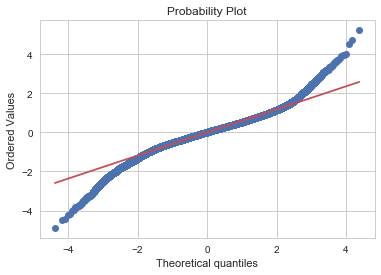

Chi^2       : 7881.589
P-value     :  0.000


In [43]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

# Outlier 제거

In [44]:
# 1차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [45]:
df_test.drop(list(drop_index),inplace=True)

In [46]:
model_1 = sm.OLS.from_formula('np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     6766.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        01:13:48   Log-Likelihood:                -76105.
No. Observations:              112808   AIC:                         1.525e+05
Df Residuals:                  112647   BIC:                         1.541e+05
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6806      0

In [84]:
# 2차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [85]:
df_test.drop(list(drop_index),inplace=True)

In [89]:
model_1 = sm.OLS.from_formula('np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     8443.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        01:23:14   Log-Likelihood:                -59456.
No. Observations:              107415   AIC:                         1.192e+05
Df Residuals:                  107254   BIC:                         1.208e+05
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5874      0

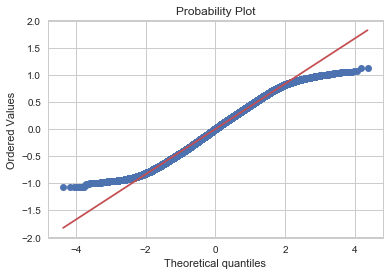

Chi^2       : 3139.067
P-value     :  0.000


In [90]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

# 정규화 (sci-kit learn)

In [48]:
from sklearn.datasets import make_regression
from patsy import dmatrices
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [49]:
# patsy를 통한 formula 생성
y, X = dmatrices( "np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek)", df_test , return_type = 'dataframe' )

In [50]:
# y, X, Linear Regression, Ridge, Lasso, ElasticNet
model_LR = LinearRegression().fit(X, y)
model_ridge = Ridge(alpha=0.5).fit(X, y)
model_lasso = Lasso(alpha=0.5).fit(X, y)
model_EN = ElasticNet(alpha=0.5).fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [51]:
from sklearn.model_selection import KFold

cv = KFold(10, shuffle=True)
#cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)
print('[Original LR]')
print('score : ', cross_val_score(model_LR, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model_LR, X, y, scoring="r2", cv=cv)),'\n')

print('[Ridge]')
print('score : ', cross_val_score(model_ridge, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model_ridge, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model_lasso, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model_lasso, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model_EN, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model_EN, X, y, scoring="r2", cv=cv)),'\n')
#      'std : ', np.std(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)))

[Original LR]
score :  [ 0.90614362  0.90769375  0.90707296  0.90459665  0.90425792  0.90307721
  0.9055149   0.90629326  0.90344257  0.9060175 ] 
 mean :  0.905391480144 

[Ridge]
score :  [ 0.90511269  0.90410519  0.90601743  0.90600492  0.90553127  0.90505433
  0.9051566   0.90906965  0.90316344  0.90508552] 
 mean :  0.905398559099 


[Lasso]
score :  [ -9.57946122e-08  -8.21720558e-05  -8.81221786e-05  -5.12240989e-06
  -2.16028854e-04  -1.39111386e-05  -8.82254658e-05  -1.69855668e-05
  -3.27510934e-07  -6.88524574e-05] 
 mean :  -6.64713800244e-05 


[Elastic-net]
score :  [ -2.09128888e-04  -1.11448348e-05  -1.38402024e-04  -3.92299935e-04
  -3.99008920e-06  -1.57906909e-06  -5.06120719e-04  -9.33352982e-06
  -1.06617129e-04  -7.92193444e-05] 
 mean :  -8.01469960211e-05 



# 모델에 제출하기에 앞선 cross-validation 결과 및 RMSLE 채점 결과

In [52]:
# RMSLE 구현 / 긁어왔습니다 
from sklearn.metrics import make_scorer
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    square_difference = difference ** 2
    mean_square_difference = square_difference.mean()
    
    score = np.sqrt(mean_square_difference)
    
    return score

rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

In [53]:
cross_val_score(model_ridge, X, y, cv=10, scoring=rmsle_score).mean()

0.29244445175946371

# 제출을 위한 test파일 준비

### test file preprocessing

In [94]:
test = pd.read_csv('../../data/basic/test.csv')
print(test.shape)
test.head()

(526917, 3)


,date,store_nbr,item_nbr
0,2013-04-01,2,1
1,2013-04-01,2,2
2,2013-04-01,2,3
3,2013-04-01,2,4
4,2013-04-01,2,5


In [95]:
key = pd.read_csv('../../data/basic/key.csv')
weather = pd.read_csv('../../data/weather_v8_with_holiday.csv')

In [96]:
test = pd.merge(test, key)

In [97]:
test = pd.merge(test, weather)

In [98]:
test.columns

Index(['date', 'store_nbr', 'item_nbr', 'station_nbr', 'Unnamed: 0', 'tmax',
       'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'codesum_YN', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'codesum_2', 'year', 'monthday', 'days', 'dayofweek', 'is_holiday'],
      dtype='object')

In [99]:
test = pd.DataFrame(test, columns=['date','dayofweek', 'is_holiday', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax',
       'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'codesum_YN', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       ])

In [100]:
test.head()

,date,dayofweek,is_holiday,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,...,sunset,codesum,codesum_YN,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2013-04-01,Mon,workday,2,1,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0
1,2013-04-01,Mon,workday,2,2,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0
2,2013-04-01,Mon,workday,2,3,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0
3,2013-04-01,Mon,workday,2,4,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0
4,2013-04-01,Mon,workday,2,5,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0


In [101]:
def is_holiday(holiday):
    if holiday == 'holiday':
        return 1
    elif holiday == 'holiday_work':
        return 1
    elif holiday == "workday":
        return 0

In [102]:
test['is_holiday'] = test['is_holiday'].apply(is_holiday)

In [103]:
test['year'] = test['date'].apply(make_year)
test['month'] = test['date'].apply(make_month)
test['day'] = test['date'].apply(make_day)
test['dayofweek'] = test['dayofweek'].apply(dayofweek_num)

In [104]:
test_sample = test.drop(columns=['date', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb',
       'sunrise', 'sunset','depart',  'codesum', 'codesum_YN', 'snowfall',
       'stnpressure', 'sealevel','resultdir', 'avgspeed',
       'station_nbr', 'heat', 'cool', 'preciptotal', 'is_holiday', 'resultspeed'])

In [105]:
test_sample.head()

,dayofweek,store_nbr,item_nbr,year,month,day
0,1,2,1,2013,4,1
1,1,2,2,2013,4,1
2,1,2,3,2013,4,1
3,1,2,4,2013,4,1
4,1,2,5,2013,4,1


In [106]:
test_X_df = pd.DataFrame(columns=['item_nbr', 'store_nbr','dayofweek', 'year', 'month', 'day'])

for nbr in range(1, 45+1):
    store_nbr = df_test[df_test['store_nbr'].isin([nbr])]
    sold_item_list = list(store_nbr['item_nbr'].unique())
    sold_item_list

    test_store_nbr = test_sample[test_sample['store_nbr'].isin([nbr])]
    to_test_df = test_store_nbr[test_store_nbr['item_nbr'].isin(sold_item_list)]

    test_X_df = pd.concat([test_X_df, to_test_df], axis = 0)
    
test_X_df.shape

(26168, 6)

In [107]:
test_X_df.head()

,day,dayofweek,item_nbr,month,store_nbr,year
484301,4,2,9,6,1,2013
484320,4,2,28,6,1,2013
484332,4,2,40,6,1,2013
484339,4,2,47,6,1,2013
484343,4,2,51,6,1,2013


In [108]:
test_X_df['store_nbr'] = test_X_df['store_nbr'].astype(int)
test_X_df['item_nbr'] = test_X_df['item_nbr'].astype(int)
test_X_df['year'] = test_X_df['year'].astype(int)
test_X_df['month'] = test_X_df['month'].astype(int)
test_X_df['day'] = test_X_df['day'].astype(int)
test_X_df['dayofweek'] = test_X_df['dayofweek'].astype(object)

### Predict

In [109]:
test_result = result_1.predict(test_X_df)

In [110]:
test_result

484301    3.340209
484320    1.490165
484332    0.221279
484339    1.870878
484343    0.143483
484381    0.294038
484385    0.782247
484391    0.498494
484412    3.299667
484431    1.449623
484443    0.180737
484450    1.830336
484454    0.102941
484492    0.253496
484496    0.741704
484502    0.457952
484523    3.277456
484542    1.427412
484554    0.158526
484561    1.808125
484565    0.080730
484603    0.231285
484607    0.719494
484613    0.435741
484634    3.380903
484653    1.530859
484665    0.261972
484672    1.911571
484676    0.184176
484714    0.334731
            ...   
513156    0.264087
513161    2.565940
513174    0.321264
513178    1.222024
513186   -0.034481
513202   -0.089360
513378    0.241876
513383    2.543729
513396    0.299053
513400    1.199813
513408   -0.056692
513424   -0.111571
513600    0.345322
513605    2.647175
513618    0.402500
513622    1.303259
513630    0.046754
513646   -0.008125
513822    0.517308
513827    2.819161
513840    0.574485
513844    1.

### create submission file

In [111]:
result = pd.concat([test, test_result], axis=1)

In [112]:
print(result.shape)
result.head()

(526917, 29)


,date,dayofweek,is_holiday,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,0
0,2013-04-01,1,0,2,1,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,NaN
1,2013-04-01,1,0,2,2,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,NaN
2,2013-04-01,1,0,2,3,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,NaN
3,2013-04-01,1,0,2,4,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,NaN
4,2013-04-01,1,0,2,5,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,4.097213


In [113]:
result['units'] = result[0]

In [114]:
def itiszero(units):
    if units > 0:
        return units
    else:
        return 0

In [115]:
result['units'] = result['units'].apply(itiszero)

In [116]:
result['units'] = result['units'].astype(int)

In [117]:
result = pd.DataFrame(data=result, columns=['store_nbr', 'item_nbr', 'date', 'units'])

In [118]:
for col in result[['store_nbr', 'item_nbr']]:
    result[col] = result[col].astype(int)

In [119]:
result['id'] = result['store_nbr'].astype(str)+'_'+result['item_nbr'].astype(str)+'_'+result['date'].astype(str)

In [120]:
for_submission = result.loc[:,['id','units']]

In [121]:
for_submission.head()

,id,units
0,2_1_2013-04-01,0
1,2_2_2013-04-01,0
2,2_3_2013-04-01,0
3,2_4_2013-04-01,0
4,2_5_2013-04-01,4


In [122]:
for_submission.to_csv('submission_sample11.csv', index=False)

### 제출

1차 : log(units), outlier제거 1번 --> submission_sample10.csv --> 0.33

2차 : log(units), outlier제거 2번 --> submission_sample11.csv --> 0.33

# 이번 시도의 결론, 

- 정규화 : 정규화를 했을 때 제출 점수가 더 낮아졌다.
- Fox Outlier Recommendation : 이 데이터셋에서는 성능 개선에 도움이 되지 않는다.
- 다음 시도에서는 outlier에만 집중할 예정